In [1]:
import os, gc
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_spectrograms(path, read_spec_files=False):

    if read_spec_files:    
        spectrograms = {}
        for i,f in enumerate(files):
            if i%100==0: print(i,', ',end='')
            tmp = pd.read_parquet(f'{path}//{f}')
            name = int(f.split('.')[0])
            spectrograms[name] = tmp.iloc[:,1:].values
    else:
        spectrograms = np.load(f"{path}", allow_pickle=True).item()
    return spectrograms

In [3]:
def get_column_names():
    columns = []
    regions = ['LL_', 'RL_', 'LP_', 'RP_']
    increments = [
        0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.76, 1.95, 2.15, 2.34,
        2.54, 2.73, 2.93, 3.13, 3.32, 3.52, 3.71, 3.91, 4.1, 4.3,
        4.49, 4.69, 4.88, 5.08, 5.27, 5.47, 5.66, 5.86, 6.05, 6.25,
        6.45, 6.64, 6.84, 7.03, 7.23, 7.42, 7.62, 7.81, 8.01, 8.2,
        8.4, 8.59, 8.79, 8.98, 9.18, 9.38, 9.57, 9.77, 9.96, 10.16,
        10.35, 10.55, 10.74, 10.94, 11.13, 11.33, 11.52, 11.72, 11.91,
        12.11, 12.3, 12.5, 12.7, 12.89, 13.09, 13.28, 13.48, 13.67,
        13.87, 14.06, 14.26, 14.45, 14.65, 14.84, 15.04, 15.23, 15.43,
        15.63, 15.82, 16.02, 16.21, 16.41, 16.6, 16.8, 16.99, 17.19,
        17.38, 17.58, 17.77, 17.97, 18.16, 18.36, 18.55, 18.75, 18.95,
        19.14, 19.34, 19.53, 19.73, 19.92
    ]

    for r in regions:
        for i in increments:
            columns.extend([f'{r}{i}'])
    return columns

def get_spect_df(spectrograms):
    columns = get_column_names()
    dataframes = {}
    for key in spectrograms:
        subset_array = spectrograms[key][:300]
        df = pd.DataFrame(subset_array, columns=columns)
        dataframes[key] = df
    return dataframes

In [8]:
def plot_spectrogram(df_spect):
    '''
    source --> https://www.kaggle.com/code/clehmann10/plot-spectrograms
    '''

    split_spect = {
        "LL": df_spect.filter(regex='^LL', axis=1),
        "RL": df_spect.filter(regex='^RL', axis=1),
        "RP": df_spect.filter(regex='^RP', axis=1),
        "LP": df_spect.filter(regex='^LP', axis=1),
    }

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])
    plt.tight_layout()
    return fig




In [4]:
PATH = r'C:\Users\zzelk\OneDrive\Desktop\harmful_brain_activity_classification\train_data\specs.npy'
spectrograms = load_spectrograms(PATH)
dataframes = get_spect_df(spectrograms)

In [10]:
dataframes.keys()

dict_keys([319287046, 440834944, 1009815187, 1649311149, 1783672670, 539664827, 1741362785, 1630403005, 199531130, 848600156, 364272312, 1225887086, 738415712, 556059024, 471860660, 967947160, 266277986, 430862222, 468272492, 1902315832, 285450038, 1988214649, 302936574, 123716031, 829498631, 1019994871, 368266781, 938086742, 649337732, 683532949, 946511111, 1505159379, 1999921430, 63355155, 343371815, 1235122664, 737654948, 1290058554, 1568893923, 835663033, 631641381, 1742724263, 1617756811, 1705480231, 2039025783, 1020943948, 1392946348, 556753045, 751855958, 1105427131, 796957931, 1711052134, 2063466307, 396748726, 414255209, 785799870, 2050197777, 128117780, 289530787, 708466206, 71546370, 621382548, 1404338130, 1861240438, 1605327953, 1901093515, 1771222618, 1986658787, 925581305, 915118753, 1790236267, 1018369896, 637276545, 243614132, 286329266, 1180275458, 1494339443, 658481533, 2132661949, 1353377955, 451597472, 556125255, 708772889, 329727159, 1124661638, 1438948421, 1493144

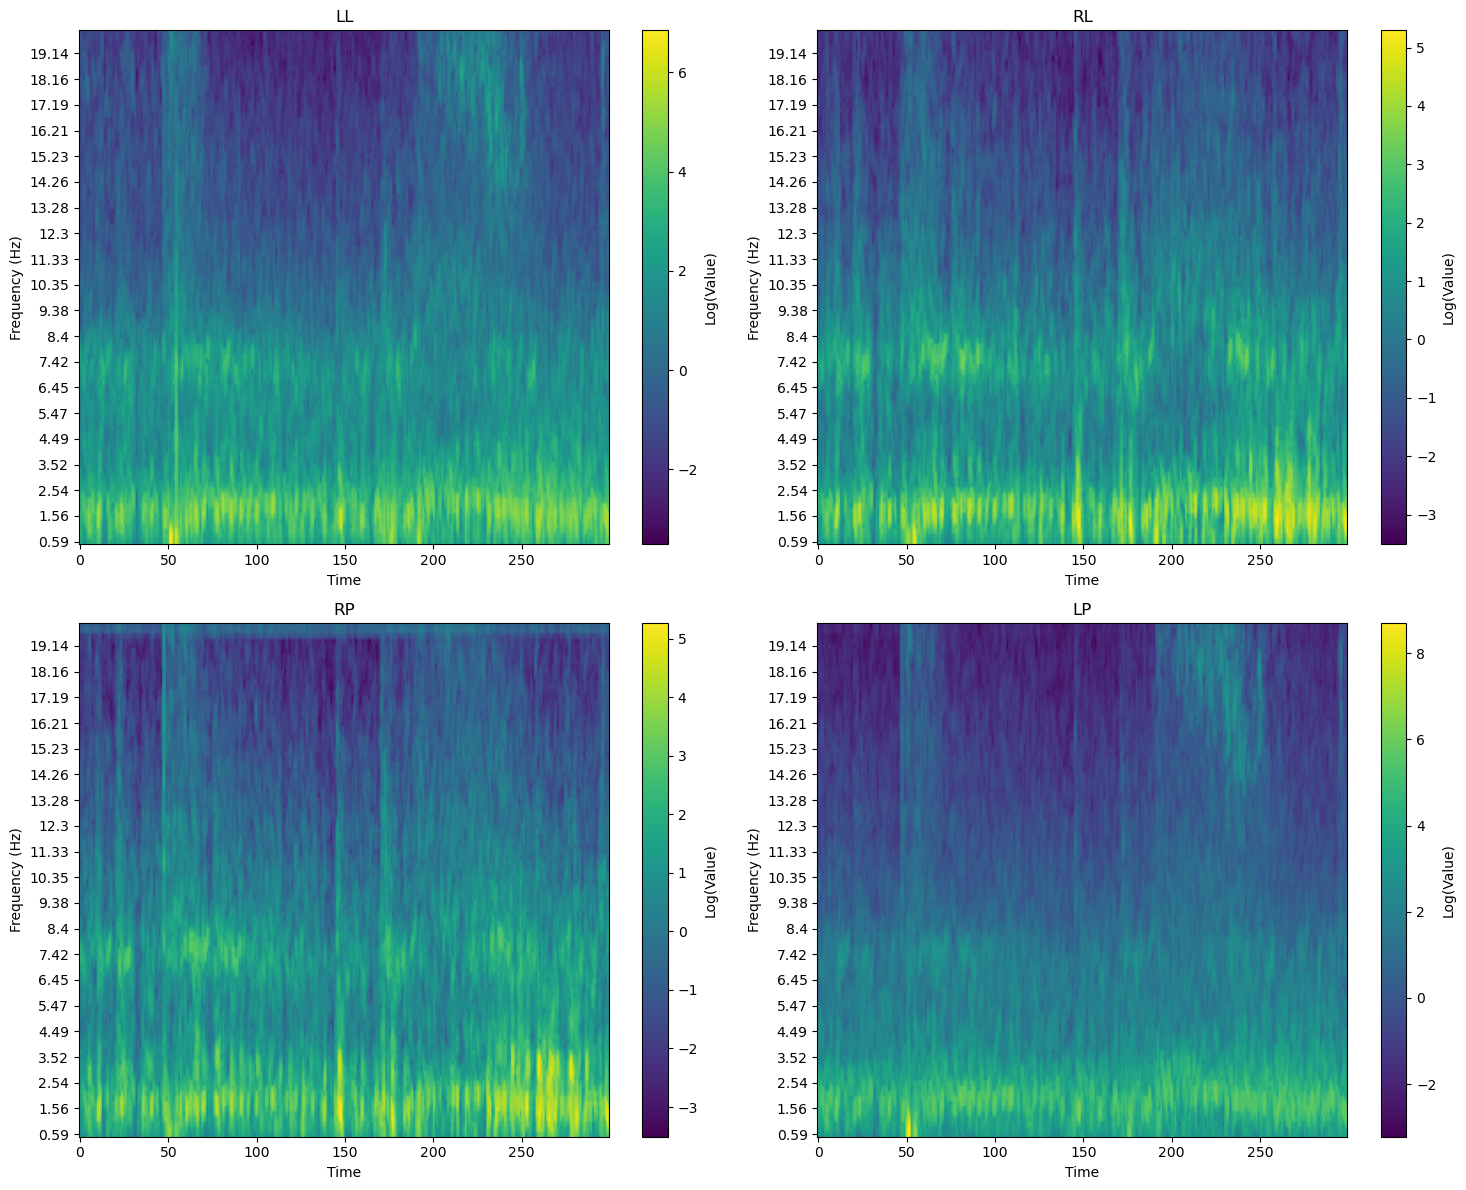

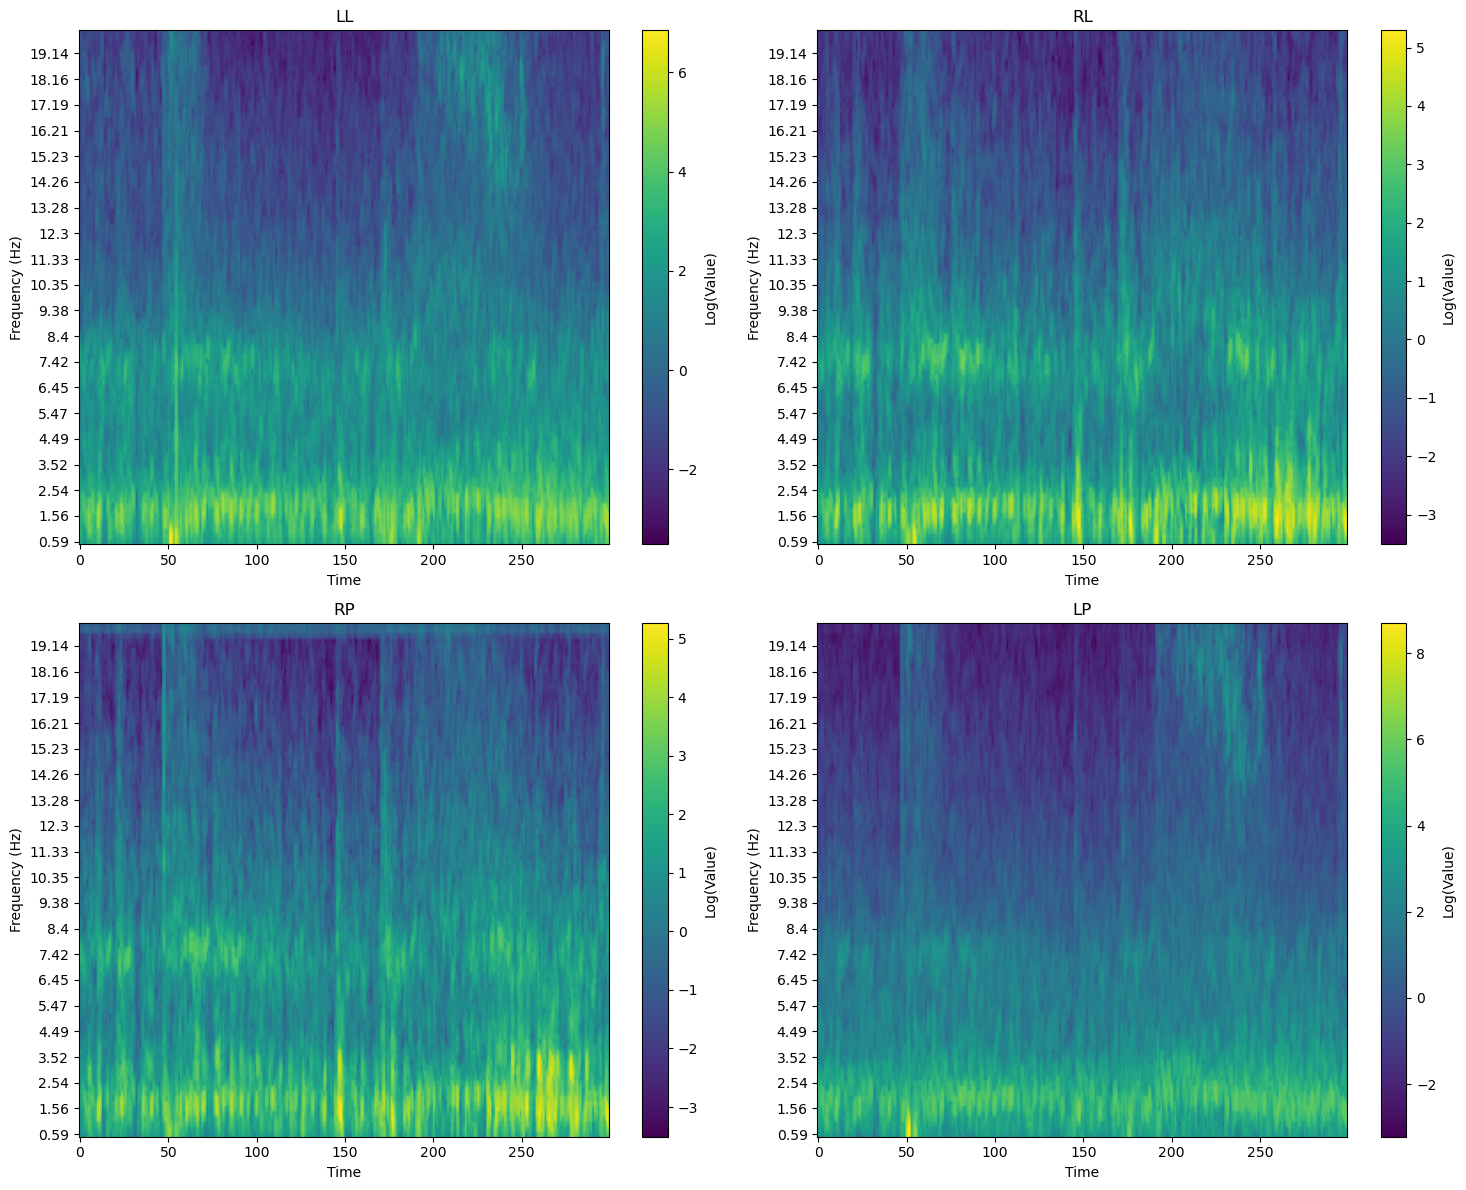

In [9]:
# example 
plot_spectrogram(dataframes[319287046])